# Dependencies

In [1]:
import pandas as pd

C:\Users\jerry\AppData\Local\Temp\ipykernel_11096\661244285.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  measurements_df = pd.read_csv('../Resources/measurements.csv')
C:\Users\jerry\AppData\Local\Temp\ipykernel_11096\661244285.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  stations_df = pd.read_csv('../Resources/stations.csv')


# Metadata (Data Dictionary)

### Import Metadata

In [3]:
DataDictionary_measurements_df = pd.read_csv('../Metadata/DataDictionary_measurements.csv')
DataDictionary_measurements_df['table'] = 'measurements'

DataDictionary_perforations_df = pd.read_csv('../Metadata/DataDictionary_perforations.csv')
DataDictionary_perforations_df['table'] = 'perforations'

DataDictionary_stations_df = pd.read_csv('../Metadata/DataDictionary_stations.csv')
DataDictionary_stations_df['table'] = 'stations'

### Combine and Display Metadata for stations

In [8]:
display(DataDictionary_stations_df)

,Unnamed: 0,column,type,label,description,table
0,0,_id,int,NaN,NaN,stations
1,1,site_code,text,NaN,NaN,stations
2,2,stn_id,text,NaN,NaN,stations
3,3,swn,text,NaN,NaN,stations
4,4,well_name,text,NaN,NaN,stations
5,5,continuous_data_station_number,text,NaN,NaN,stations
6,6,latitude,numeric,NaN,NaN,stations
7,7,longitude,numeric,NaN,NaN,stations
8,8,gse,numeric,NaN,NaN,stations
9,9,rpe,numeric,NaN,NaN,stations


### Display all metadata that does not have nulls (excludes all station metadata)

In [11]:
display_columns = ['column', 'label', 'description', 'table', 'type']
combined_metadata_df = pd.concat([DataDictionary_measurements_df, DataDictionary_perforations_df, DataDictionary_stations_df], ignore_index=True)
combined_metadata_df = combined_metadata_df.sort_values(by='column', ascending=True)
combined_metadata_df = combined_metadata_df[display_columns]
combined_metadata_df = combined_metadata_df.dropna(subset=['label', 'description'])
combined_metadata_df

,column,label,description,table,type
19,bot_prf_int,Depth To Bottom of Perforation Interval,Depth in feet below ground surface to the bott...,perforations,numeric
12,coop_org_name,Collecting Organization,Organization which collected the water level m...,measurements,text
6,gse_gwe,Ground Surface Elevation to Groundwater Elevation,Depth to groundwater surface in feet below gro...,measurements,numeric
5,gwe,Groundwater Elevation (ft),Groundwater elevation in feet above mean sea l...,measurements,numeric
13,monitoring_program,DWR Monitoring Program,DWR Monitoring Program this well is primarily ...,measurements,text
15,msmt_cmt,Water Level Measurement Comments,Comment recorded for this water level measurem...,measurements,text
2,msmt_date,Water Level Measurement Date (PST),Date and time water level measurement was take...,measurements,timestamp
17,site_code,Site Code,Location based 18 character alphanumeric code ...,perforations,text
1,site_code,Site Code,Location based 18 character alphanumeric code ...,measurements,text
14,source,Data source,The DWR data source the measurement. Options ...,measurements,text


# Import Data

### Import Measurements, Perforations and Stations

In [ ]:
measurements_df = pd.read_csv('../Resources/measurements.csv')
perforations_df = pd.read_csv('../Resources/perforations.csv')
stations_df = pd.read_csv('../Resources/stations.csv')

# Merge data

### Length of dataframes before merging

In [12]:
len_measurements = len(measurements_df)
len_perforations = len(perforations_df)
len_stations =  len(stations_df)
print(f"Length of measurements_df is {len_measurements}.  Length of perforations_df is {len_perforations}.  Length of stations is {len_stations}.")

Length of measurements_df is 5374924.  Length of perforations_df is 14771.  Length of stations is 46641.


### Merge dataframes

In [13]:
# Left join measurements_df with perforations_df
Groundwater_df = pd.merge(measurements_df, perforations_df, on='site_code', how='left')

# Left join the result with stations_df
Groundwater_df = pd.merge(Groundwater_df, stations_df, on='site_code', how='left')

### Length of Groundwater_df dataframe after merging

In [15]:
length_after_merge = len(Groundwater_df)

7899431

# Drop Duplicates

In [16]:
Groundwater_df = Groundwater_df.drop_duplicates(keep='last')

In [17]:
length_after_droping_duplicates = len(Groundwater_df)

In [ ]:
print(f"The merged dataset has {length_after_merge} rows but {length_after_merge-length_after_droping_duplicates} duplicates were dropped, leaving {}"

# Convert date to year and group by year for counts

In [16]:
Groundwater_df['year'] = Groundwater_df['msmt_date'].str[:4]
Groundwater_df['year'] = Groundwater_df['year'].astype(int)
year_counts = Groundwater_df.groupby('year').size()
year_counts = year_counts.to_frame()
year_counts = year_counts.reset_index()
year_counts.columns = ['year', 'count']

# Group by year and get average of ground water elevation

In [30]:
# Group by 'year' and calculate the average 'gwe'
average_gwe_by_year = Groundwater_df.groupby('year')['gwe'].mean().reset_index()

# Rename the column for clarity
average_gwe_by_year.rename(columns={'gwe': 'average_gwe'}, inplace=True)

average_gwe_by_year = average_gwe_by_year.sort_values(by='year', ascending=False)


average_gse_gwe_by_year = Groundwater_df.groupby('year')['gse_gwe'].mean().reset_index()

# Rename the column for clarity
average_gse_gwe_by_year.rename(columns={'gse_gwe': 'average_gse_gwe'}, inplace=True)

average_gse_gwe_by_year = average_gse_gwe_by_year.sort_values(by='year', ascending=False)

,year,average_gse_gwe
126,2024,41.808258
125,2023,64.570539
124,2022,36.416349
123,2021,65.565614
122,2020,56.736423
121,2019,60.350402
120,2018,66.943946
119,2017,60.423106
118,2016,71.401163
117,2015,65.150915


# Filter by Years

In [31]:
year1 = 1950
year2 = 2025
plot_gwe = average_gwe_by_year[(average_gwe_by_year['year'] >= year1) & (average_gwe_by_year['year'] <= year2)]
plot_gse_gwe = average_gse_gwe_by_year[(average_gse_gwe_by_year['year'] >= year1) & (average_gse_gwe_by_year['year'] <= year2)]

# Scatterplot of year by Average GWE 

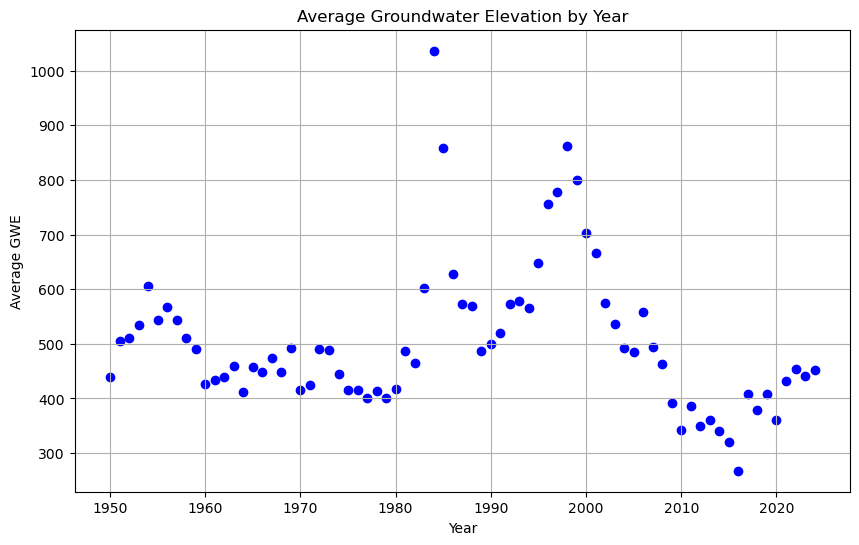

In [32]:
import matplotlib.pyplot as plt



# Sample DataFrame (assuming average_gwe_by_year is already created)
# average_gwe_by_year = pd.DataFrame({
#     'year': [2020, 2021, 2022],
#     'average_gwe': [15.2, 14.8, 15.6]
# })

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: specify the figure size
plt.scatter(plot_df['year'], plot_df['average_gwe'], color='b', marker='o')

# Add title and labels
plt.title('Average Groundwater Elevation by Year')
plt.xlabel('Year')
plt.ylabel('Average GWE')

# Display the plot
plt.grid(True)  # Optional: add a grid for better readability
plt.show()


# Scatterplot of year by Average gse_gwe 

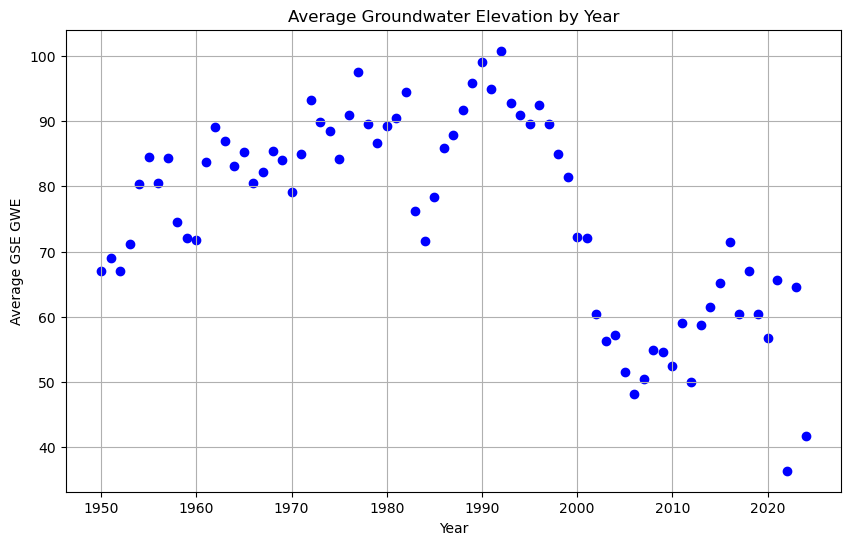

In [34]:
import matplotlib.pyplot as plt



# Sample DataFrame (assuming average_gwe_by_year is already created)
# average_gwe_by_year = pd.DataFrame({
#     'year': [2020, 2021, 2022],
#     'average_gwe': [15.2, 14.8, 15.6]
# })

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: specify the figure size
plt.scatter(plot_gse_gwe['year'], plot_gse_gwe['average_gse_gwe'], color='b', marker='o')

# Add title and labels
plt.title('Average Groundwater Elevation by Year')
plt.xlabel('Year')
plt.ylabel('Average GSE GWE')

# Display the plot
plt.grid(True)  # Optional: add a grid for better readability
plt.show()


# Confirm Primary Keys

In [ ]:
import pandas as pd

stations_df = pd.read_csv('stations.csv')

# Check for null values in 'site_code'
null_values = stations_df['stn_id'].isnull().sum()

# Check for uniqueness of 'site_code'
unique_values = stations_df['stn_id'].nunique()
total_values = stations_df['stn_id'].count()
print(f"Number of unique values in 'site_code': {unique_values}")
print(f"Total number of values in 'site_code': {total_values}")

# Determine if 'site_code' is a primary key
if null_values == 0 and unique_values == total_values:
    print("The 'stn_id' column is a primary key.")
else:
    print("The 'stn_id' column is not a primary key.")